In [1]:
import numpy as np
import matplotlib.pyplot as plt

References
- [Gibs Sampling: Data Science Concepts](https://www.youtube.com/watch?v=7LB1VHp4tLE&t=264s)
- [Code With Me: Gibbs Sampling](https://www.youtube.com/watch?v=MNHIbOqH3sk&t=180s)

Gibbs sampling is useful (and really only makes sense) in the case where the distribution that you are trying to sample from has **two or more dimensions**.

Gibbs sampling can be used effectively when sampling from the multivariate joint (probability) distribution is tricky (or impossible), but we can easily sample from the conditional distributions (densities).

Suppose that we are sampling from some $\, 2\text{-dimensional} \,$ probability distribution, whose joint probability density function is $\, f(x,y). \,$ Let's assume that sampling from $\, f(x,y) \,$ is difficult (we may not even have the equation for it). In other words, sampling $\, (x,y) \,$ points simultaneously from $\, f(x,y) \,$ is difficult. However, suppose that sampling from the conditional distributions $\, f(x|y), \,$ and $\, f(y|x) \,$ is easy. What this means is that we are effectively sampling from a $\, 1\text{-dimensional} \,$ (conditional) distributions, given some fixed values of $\, x \,$ and $\, y. \,$

The Gibbs Sampling Algorithm:

**1**. Start by initializing some point $\, (x_0, y_0) \,$ (preferably some point that is close to the center of the distribution for faster convergence)

**2**. Sample $\, x_1 \sim f(x_1 | y_0) \,$

**3**. Sample $\, y_1 \sim f(y_1 | x_1) \,$

$\quad \rightarrow (x_1,y_1) \,$ is the second sampled data point (the initialized "sample" $\, (x_0, y_0) \,$ is the first data point

**4.** Repeat from step **2**

Suppose that we want to sample from a $\, 2\text{-dimensional} \,$ normal distribution (note that we don't need Gibbs sampling from this, but this is just for the sake of example) with parameters $\, \mu \,$ and $\, \Sigma \,$ defined as

$$ \mu = \begin{bmatrix}
0\\
0
\end{bmatrix}, \quad \Sigma = \begin{bmatrix}
1 & \frac{1}{2}\\
\frac{1}{2} & 1
\end{bmatrix}. $$

Let's first take a look what this distribution looks like with NumPy, then we'll use Gibbs sampling to replicate the result.

<h3>NumPy</h3>

In [2]:
def gen_samples_np(n):
    mu = np.array([0,0])
    Sigma = np.array([1, 1/2, 1/2, 1]).reshape(2,2)
    samples = np.random.multivariate_normal(mean=mu, cov=Sigma, size=n)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(samples[:,0], samples[:,1], facecolors='none', edgecolors='black', alpha=0.5)
    return samples

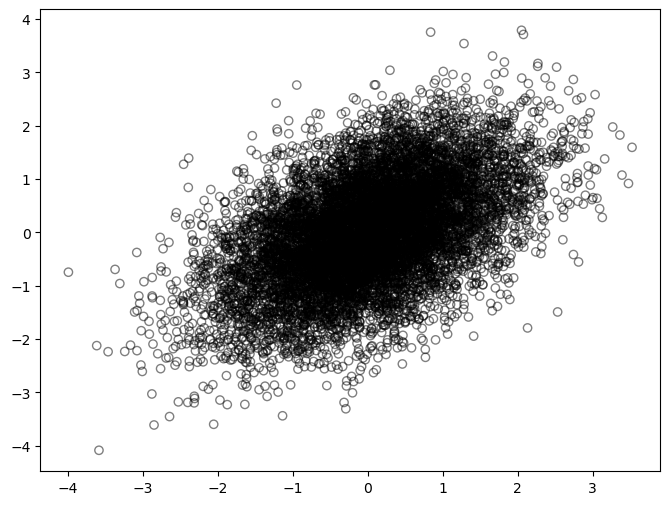

In [3]:
samples_np = gen_samples_np(n=10000)

<h3>Gibbs sampling</h3>

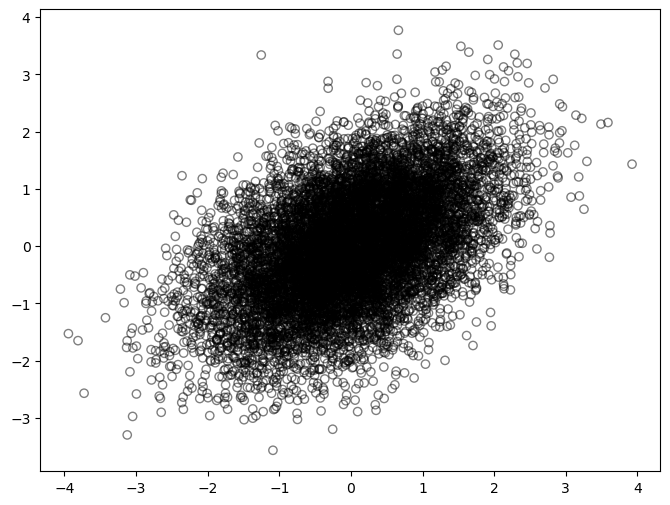

In [4]:
# Initialize (x0,y0)
samples_gibbs = {
    'x': [1],
    'y': [-1]
}
n = 10000    # The number of samples to generate

for _ in range(n):
    current_y = samples_gibbs['y'][-1]    # Take the latest sample from y
    new_x = np.random.normal(current_y/2, np.sqrt(3/4))    # 1-dimensional normal distr
    new_y = np.random.normal(new_x/2, np.sqrt(3/4))        # 1-dimensional normal distr
    samples_gibbs['x'].append(new_x)
    samples_gibbs['y'].append(new_y)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(samples_gibbs['x'], samples_gibbs['y'], facecolors='none', edgecolors='black', alpha=0.5);

<h3>Checking that the marginal distributions match</h3>

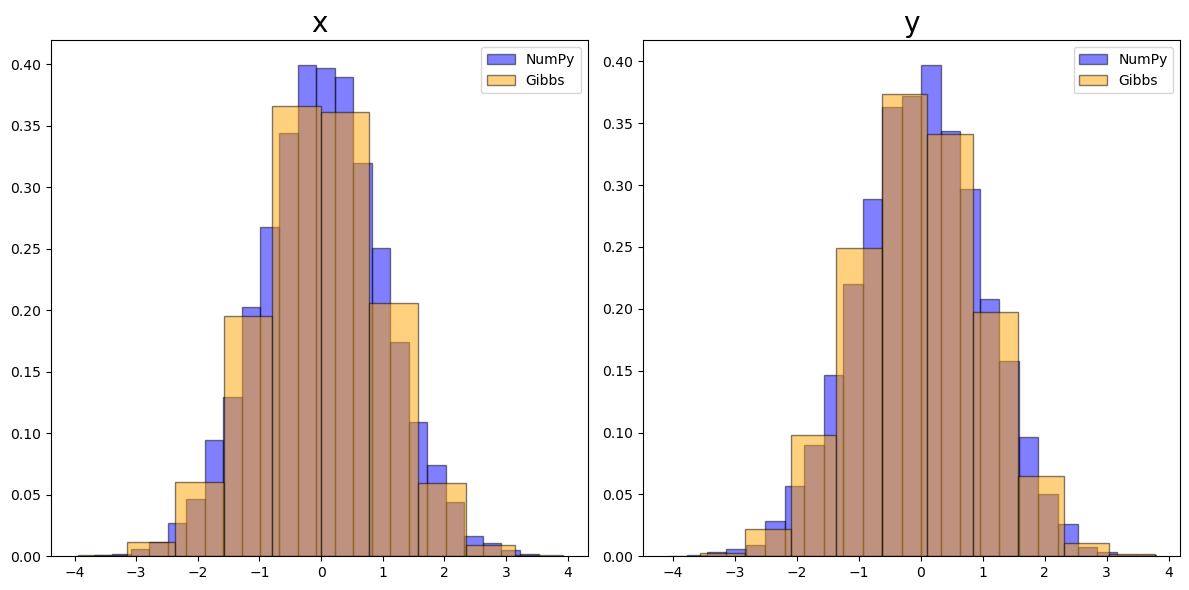

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].hist(samples_np[:,0], 
           density=True, 
           bins=25,
           edgecolor='black', 
           alpha=0.5, 
           color='blue', 
           label='NumPy')
ax[0].hist(samples_gibbs['x'], 
           density=True, 
           edgecolor='black', 
           alpha=0.5, 
           color='orange', 
           label='Gibbs')
ax[0].legend()
ax[0].set_title('x', size=20)

ax[1].hist(samples_np[:,1], 
           density=True, 
           bins=25,
           edgecolor='black', 
           alpha=0.5, 
           color='blue', 
           label='NumPy')
ax[1].hist(samples_gibbs['y'], density=True, edgecolor='black', alpha=0.5, color='orange', label='Gibbs')
ax[1].legend()
ax[1].set_title('y', size=20)

plt.tight_layout();